In [3]:
#Check the version
R.version.string
getwd()

[1] "R version 3.6.3 (2020-02-29)"

[1] "C:/Users/user/Desktop/Workspaces/R/INAB/code"

In [4]:
# Install packages

# install.packages('stringr')
# install.packages('glue')
# install.packages('purrr')
# install.packages('tictoc')

In [5]:
# Load libraries
library(stringr)
library(glue)
library(purrr)
# library(tictoc)

In [6]:
#Get the statistical results for a specific dataset and cutoff
table_cutoff_godel<- function(data, num_of_cuts){
    
    # Default = 10 points
    if(missing(num_of_cuts)){
        num_of_cuts = 9
    }
    
    min_godel = min(data$Godel_number)
    max_godel = max(data$Godel_number)
    seg = (max_godel - min_godel)/(num_of_cuts + 1)
    seq_cuts = seg*(1:num_of_cuts)
    
    wilcoxon <- matrix(, nrow = 3, ncol = num_of_cuts, dimnames = list(c('Low-High', 'Low-Total', 'High-Total'), seq_cuts))
    fisher <- matrix(, nrow = 3, ncol = num_of_cuts, dimnames = list(c('Low-High', 'Low-Total', 'High-Total'), seq_cuts))
    kolm_smirnov <- matrix(, nrow = 3, ncol = num_of_cuts, dimnames = list(c('Low-High', 'Low-Total', 'High-Total'), seq_cuts))
    
    #STATISTICAL TESTS [WILCOXON, FISHER, KOLMOGOROV-SMIRNOV]  
    
    for (cut in 1:num_of_cuts){
        
        low_godel <- data[data$Godel_number < min_godel + seg*cut, ]
        high_godel <- data[data$Godel_number >= min_godel + seg*cut, ]

        low = low_godel[, 3]
        high = high_godel[, 3]
        total = data[, 3]
    
#Wilcoxon Test
        w1 = wilcox.test(low, high)$p.value
        w1[w1 >= 0.05] <- 1
        w1[w1 < 0.05] <- 0
        wilcoxon[1, cut] = as.integer(w1)
        
        w2 = wilcox.test(low, total)$p.value
        w2[w2 >= 0.05] <- 1
        w2[w2 < 0.05] <- 0
        wilcoxon[2, cut] = as.integer(w2)
        
        w3 = wilcox.test(high, total)$p.value
        w3[w3 >= 0.05] <- 1
        w3[w3 < 0.05] <- 0
        wilcoxon[3, cut] = as.integer(w3)

        #Fisher Test
        f1 = var.test(low, high)$p.value
        f1[f1 >= 0.05] <- 1
        f1[f1 < 0.05] <- 0
        fisher[1, cut] = as.integer(f1)
        
        f2 = var.test(low, total)$p.value
        f2[f2 >= 0.05] <- 1
        f2[f2 < 0.05] <- 0
        fisher[2, cut] = as.integer(f2)
        
        f3 = var.test(high, total)$p.value
        f3[f3 >= 0.05] <- 1
        f3[f3 < 0.05] <- 0
        fisher[3, cut] = as.integer(f3)

        #Kolmogorov-Smirnov
        k1 = ks.test(low, high)$p.value
        k1[k1 >= 0.05] <- 1
        k1[k1 < 0.05] <- 0
        kolm_smirnov[1, cut] = as.integer(k1)
        
        k2 = ks.test(low, total)$p.value
        k2[k2 >= 0.05] <- 1
        k2[k2 < 0.05] <- 0
        kolm_smirnov[2, cut] = as.integer(k2)
        
        k3 = ks.test(high, total)$p.value
        k3[k3 >= 0.05] <- 1
        k3[k3 < 0.05] <- 0
        kolm_smirnov[3, cut] = as.integer(k3)
        }

    return (list(wilcoxon, fisher, kolm_smirnov))
}

In [14]:
#Main
options(warn = -1)

#Choose k
k = 20
num_of_cuts = 19 # num_of_points = num_of_cuts + 1

#Load data
data_path = file.path('C:','Users', 'user', 'Desktop', 'Workspaces', 'R', 'INAB', 'data', glue('sars_1000_info_k={k}.txt'))
data <- read.table(data_path)

#Filter data for 'ACTG'
filt_data <- data[str_detect(data[, 1], '^[ACTG]+$'),]
tbl = table_cutoff_godel(filt_data, num_of_cuts)
tbl

#Save results
res_path = file.path('C:','Users', 'user', 'Desktop', 'Workspaces', 'R', 'INAB', 'results')
write.csv(tbl[1], glue('{res_path}/table_godel_wilcox_k={k}'))
write.csv(tbl[2], glue('{res_path}/table_godel_fisher_k={k}'))
write.csv(tbl[3], glue('{res_path}/table_godel_kolm_k={k}'))

,8.71332505,17.4266501,26.13997515,34.8533002,43.56662525,52.2799503,60.99327535,69.7066004,78.41992545,87.1332505,95.84657555,104.5599006,113.27322565,121.9865507,130.69987575,139.4132008,148.12652585,156.8398509,165.55317595
Low-High,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Low-Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
High-Total,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
,8.71332505,17.4266501,26.13997515,34.8533002,43.56662525,52.2799503,60.99327535,69.7066004,78.41992545,87.1332505,95.84657555,104.5599006,113.27322565,121.9865507,130.69987575,139.4132008,148.12652585,156.8398509,165.55317595
Low-High,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Low-Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
High-Total,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
,8.71332505,17.4266501,26.13997515,34.8533002,43.56662525,52.2799503,60.99327535,69.7066004,78.41992545,87.1332505,95.84657555,104.5599006,113.27322565,121.9865507,130.69987575,139.4132008,148.12652585,156.8398509,165.55317595
Low-High,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Low-Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


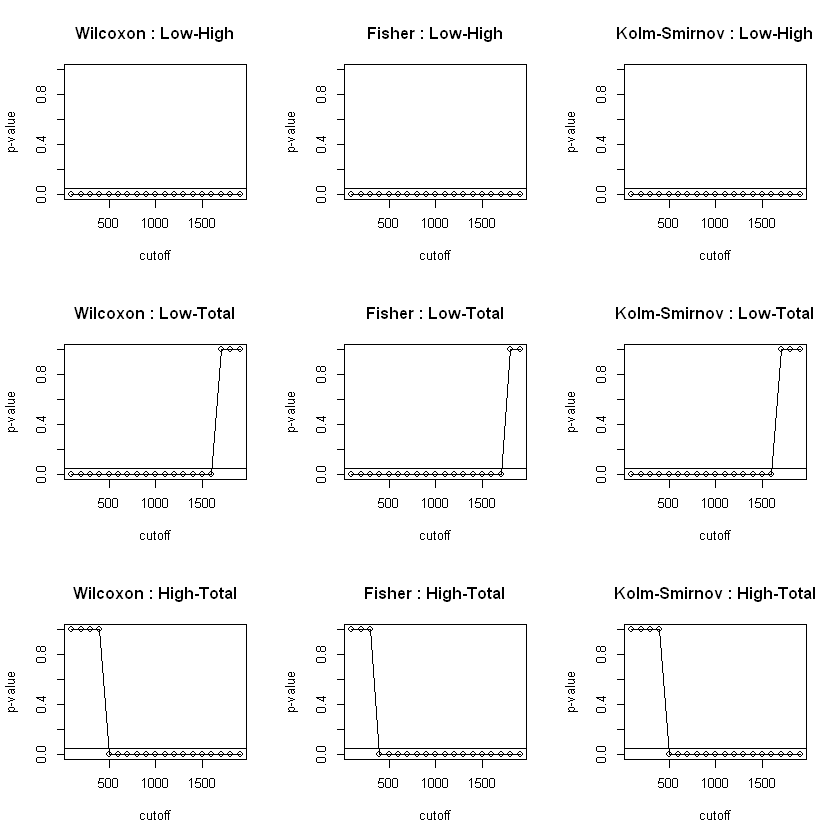

In [15]:
#Plots - ALL
img_path = glue('{res_path}/img')
# png(glue('{img_path}/stats_godel_k={k}.png'))
par(mfcol=c(3,3))


seq_cuts = 100*(1:num_of_cuts)
y_lim = c(0,1)
# y_lim = NULL

#Wilcoxon
df_w = as.data.frame(stats[1])

plot(x = seq_cuts, y = unlist(df_w[1, ]), type = 'o', main = 'Wilcoxon : Low-High', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

plot(x = seq_cuts, y = unlist(df_w[2, ]), type = 'o', main = 'Wilcoxon : Low-Total', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

plot(x = seq_cuts, y = unlist(df_w[3, ]), type = 'o', main = 'Wilcoxon : High-Total', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

#Fisher
df_f = as.data.frame(stats[2])

plot(x = seq_cuts, y = unlist(df_f[1, ]), type = 'o', main = 'Fisher : Low-High', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

plot(x = seq_cuts, y = unlist(df_f[2, ]), type = 'o', main = 'Fisher : Low-Total', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

plot(x = seq_cuts, y = unlist(df_f[3, ]), type = 'o', main = 'Fisher : High-Total', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

#Kolmogorov-Smirnov
df_k = as.data.frame(stats[3])

plot(x = seq_cuts, y = unlist(df_k[1, ]), type = 'o', main = 'Kolm-Smirnov : Low-High', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

plot(x = seq_cuts, y = unlist(df_k[2, ]), type = 'o', main = 'Kolm-Smirnov : Low-Total', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

plot(x = seq_cuts, y = unlist(df_k[3, ]), type = 'o', main = 'Kolm-Smirnov : High-Total', xlab = 'cutoff', ylab = 'p-value', ylim = y_lim)
abline(h = 0.05)

# dev.off()